<a href="https://colab.research.google.com/github/joepaul13/Runtime-Terror/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
#This is a piece of code to demonstrate linear regression on some data. We use the stochastic gradient descent method here.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import files    #This CSV file contains a list of values on the x and y-axes.
uploaded = files.upload()

Saving data.csv to data.csv


In [3]:
my_data = np.genfromtxt('data.csv',delimiter = ',')  #Reading from the file.
x = my_data[:,0].reshape(-1,1)     #Forming the arrays for the hypothesis function.
ones = np.ones([x.shape[0],1])
x = np.concatenate([ones,x],1)
y = my_data[:,1].reshape(-1,1)

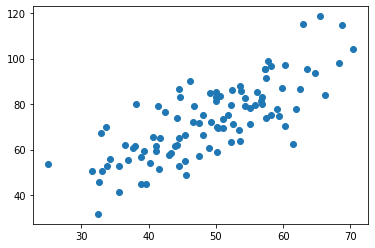

In [4]:
plt.scatter(my_data[:,0].reshape(-1,1),y) #Plotting the data

In [60]:
alpha = 0.00001
iters = 10000
theta = np.array([[8.0,5.0]])  #The array of paraeters to be determined.

In [61]:
def computeCost(x, y, theta):
  inner = np.power(((x @ theta.T)-y),2)    #This is the cost function used. It is a squared error function. I used the Hadamard product for multiplication.
  return np.sum(inner)/(2*len(x))

In [62]:
def gradientDescent(x, y, theta, alpha, iters):  #Running the gradient descent algorithm.
  for i in range(iters):
    theta = theta - (alpha/len(x))*np.sum(((x @ theta.T)-y)*x, axis = 0)
    cost = computeCost(x, y, theta)
  return (theta,cost)

In [63]:
g,cost = gradientDescent(x, y, theta, alpha, iters)
print(g,cost)   #I obtained this as the minimum error after changing the values of the parameters, alpha and no. of iterations.

[[7.9279813  1.32367005]] 55.12876674039711


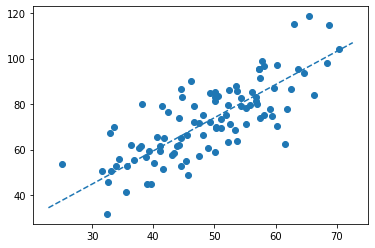

In [11]:
plt.scatter(my_data[:,0].reshape(-1,1),y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = g[0][0] + g[0][1]*x_vals
plt.plot(x_vals, y_vals, '--')   #Plotting the best fit curve.